# Basic imports and definitions

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import importlib
import os
import sys

import qutip
from pprint import pprint
from IPython.display import display, HTML, Markdown
import seaborn as sns
sns.set_theme()
import plotly
import plotly.express as px
import plotly.subplots as sp
## Tomas Mazak's workaround
plotly.offline.init_notebook_mode()
display(HTML(
    '<script type="text/javascript" async src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.1/MathJax.js?config=TeX-MML-AM_SVG"></script>'
))
##

# list of all 16 two-qubit pauli operators
one_qubit_paulis = [qutip.qeye(2), qutip.sigmax(), qutip.sigmay(), qutip.sigmaz()]
two_qubit_paulis = [qutip.tensor(p1, p2) for p1 in one_qubit_paulis for p2 in one_qubit_paulis]
# list with the projections onto the four bell states
bell_states = [qutip.bell_state('00'), qutip.bell_state('01'), qutip.bell_state('10'), qutip.bell_state('11')]
# witness operators for the four bell states
bell_witnesses = [qutip.qeye([2, 2]) / 2 - bell_state * bell_state.dag() for bell_state in bell_states]

# add absolute current path to path
sys.path.append(os.path.abspath('.'))

import ExperimentalDataset
importlib.reload(ExperimentalDataset)
from ExperimentalDataset import ExperimentalDataset

import QELM
importlib.reload(QELM)

from utils import train_and_test_QELM_on_doubles, plot_paulis_scatter


dir_experimental_data_0902 = os.path.join('..', 'experimental data', 'dati 2024-09-02')
dir_experimental_data_0920 = os.path.join('..', 'experimental data', 'dati 2024-09-20')
dir_experimental_data_0930 = os.path.join('..', 'experimental data', 'dati 2024-09-30')
dir_experimental_data_1108 = os.path.join('..', 'experimental data', 'dati 2024-11-08')
dir_experimental_data_0109 = os.path.join('..', 'experimental data', 'dati 2025-01-09')


In [54]:
two_qubit_paulis[5]

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

# Train and test on doubles

## 09-02 data

array([[0.03889823, 0.12468552, 0.09152322, 0.1305421 ],
       [0.12468552, 0.816099  , 0.23266733, 0.16941173],
       [0.09152322, 0.23266733, 0.43228084, 0.17019097],
       [0.1305421 , 0.16941173, 0.17019097, 0.55883063]])

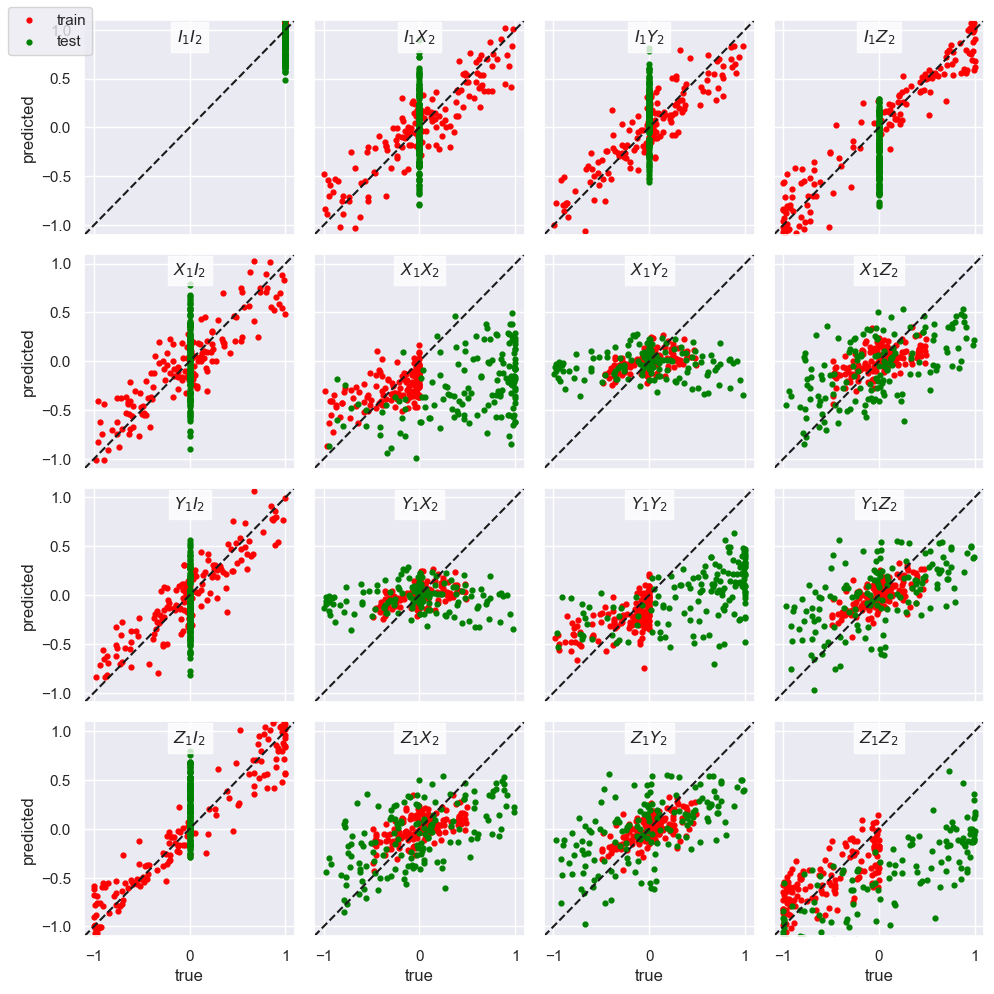

In [2]:
qelm = train_and_test_QELM_on_doubles(dir_experimental_data_0902, 'sep', 'ent', two_qubit_paulis)
display(qelm.test_MSE.reshape(4, 4))
plot_paulis_scatter(qelm, plotly=False)

## 09-20 data

array([[0.50762593, 0.23635558, 0.42640449, 1.24079198],
       [0.23635558, 0.42287949, 0.78600852, 0.69425089],
       [0.42640449, 0.78600852, 0.42625179, 0.84555251],
       [1.24079198, 0.69425089, 0.84555251, 4.7472891 ]])

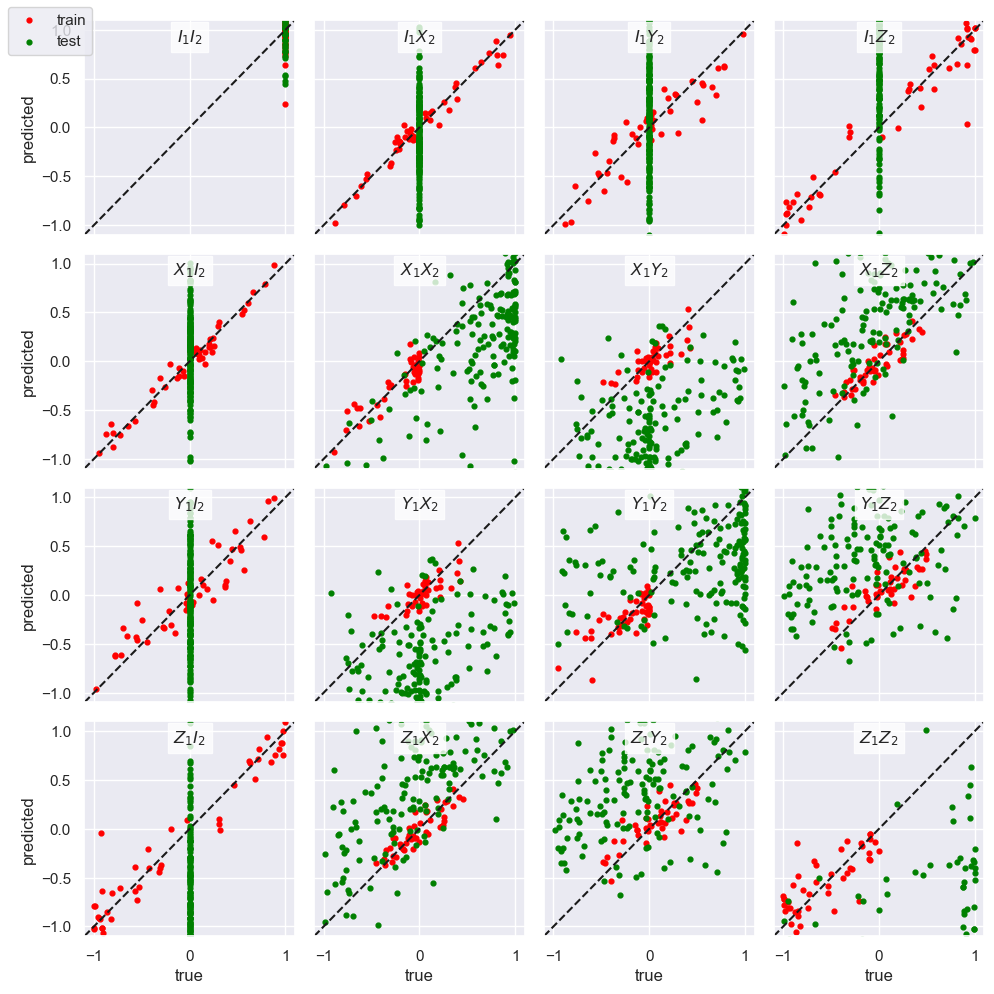

In [ ]:
qelm = train_and_test_QELM_on_doubles(dir_experimental_data_0920, 'sep', 'ent', two_qubit_paulis)
display(qelm.test_MSE.reshape(4, 4))
plot_paulis_scatter(qelm, plotly=False)

## 09-30 data

array([[0.01852208, 0.02527566, 0.04057328, 0.05773147],
       [0.03021313, 0.15661469, 0.25859591, 0.09226871],
       [0.03891638, 0.33074487, 0.33898415, 0.23373508],
       [0.09688662, 0.14948246, 0.20500446, 0.27171938]])

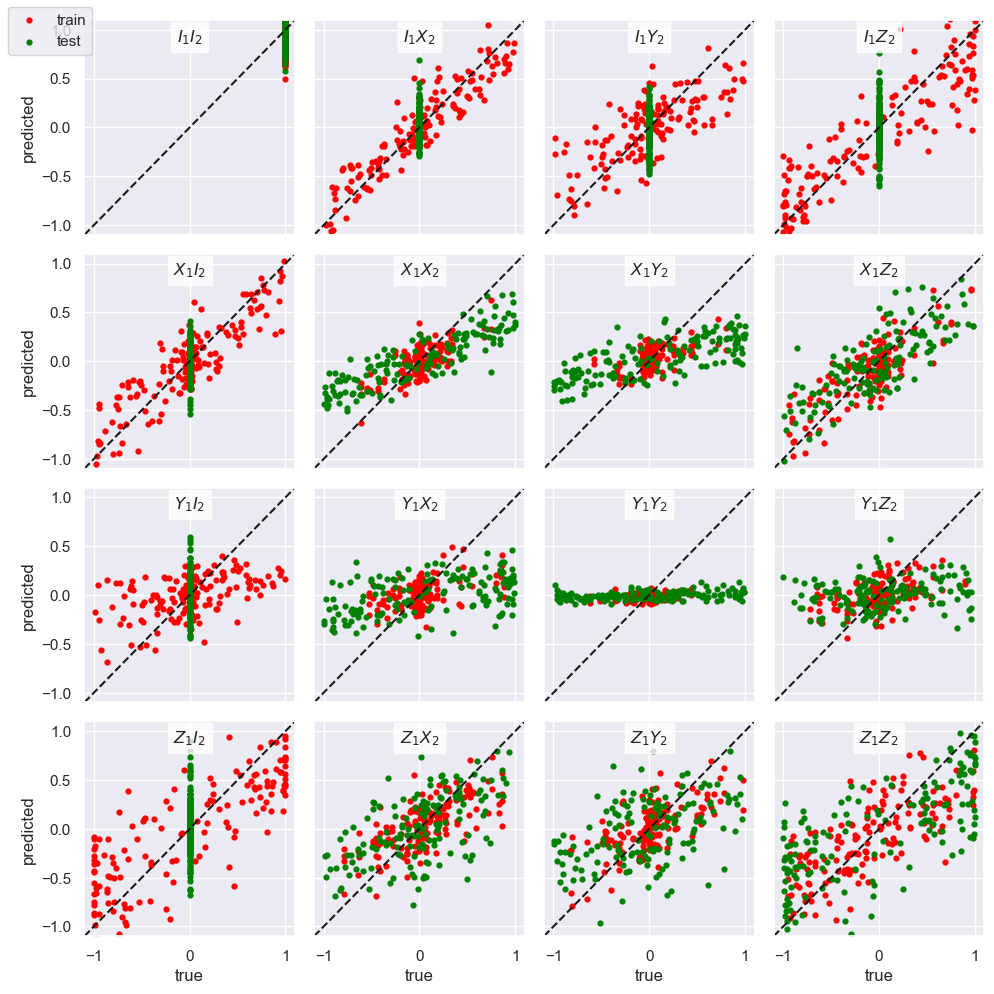

In [63]:
qelm = train_and_test_QELM_on_doubles(dir_experimental_data_0930, 'sep', 'ent', two_qubit_paulis)
display(qelm.test_MSE.reshape(4, 4))
plot_paulis_scatter(qelm, plotly=False)

Same as above but only using first repetitions for train and test:

array([[0.02754706, 0.03521557, 0.04267615, 0.06708349],
       [0.02748118, 0.16911703, 0.28051817, 0.10148026],
       [0.03225877, 0.34203826, 0.3488559 , 0.24812987],
       [0.08930632, 0.14171438, 0.2222949 , 0.31888194]])

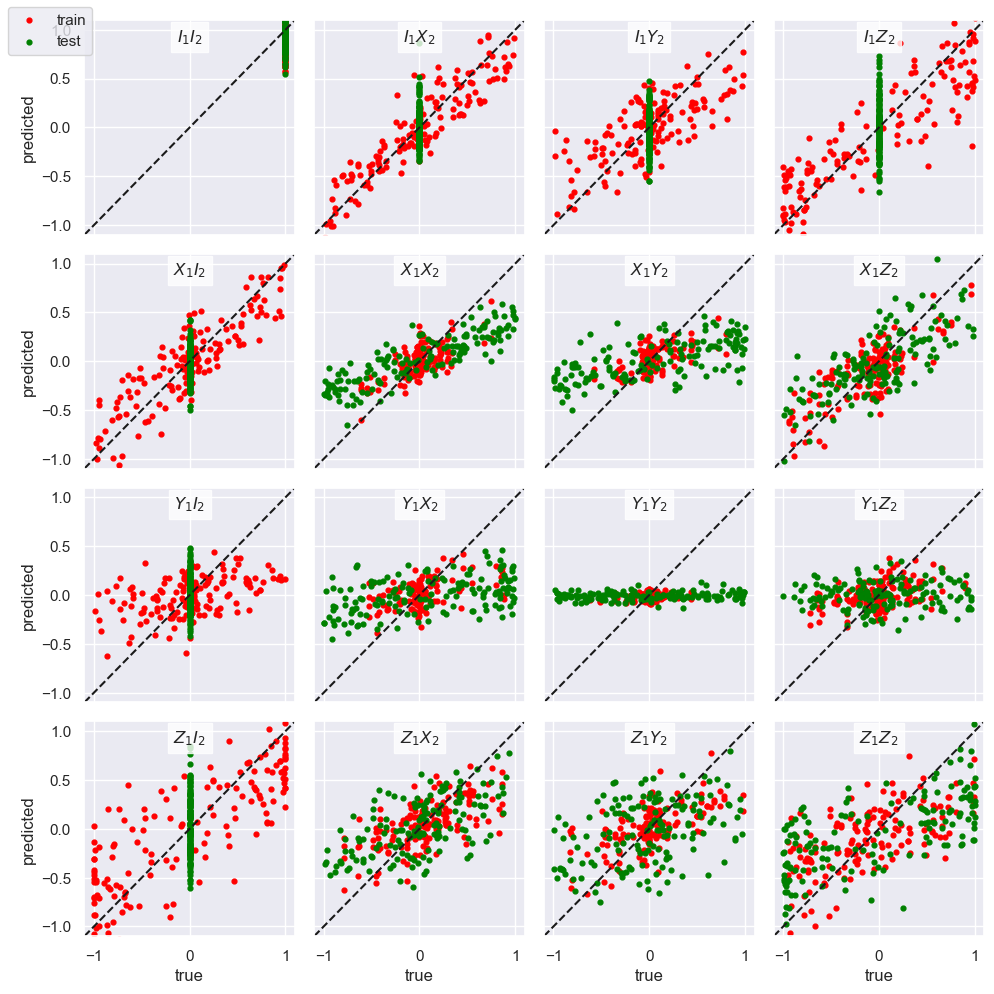

In [64]:
qelm = train_and_test_QELM_on_doubles(dir_experimental_data_0930, target_observables=two_qubit_paulis,
                                      which_states_train='sep', which_states_test='ent',
                                      mean_or_sum='mean',
                                      which_reps_train=[0], which_reps_test=[0])
display(qelm.test_MSE.reshape(4, 4))
plot_paulis_scatter(qelm, plotly=False)

# 01-09 data

In [ ]:
qelm = train_and_test_QELM_on_doubles(dir_experimental_data_0109, 'sep', 'ent', two_qubit_paulis)
display(qelm.test_MSE.reshape(4, 4))
plot_paulis_scatter(qelm, plotly=False)

# Training on singles

### With 30-09 data

array([[5.77511921e-31, 5.15101290e-02, 4.72979212e-02, 1.10333984e-01],
       [2.54824970e-02, 7.56371395e-02, 1.98282598e-01, 1.16614763e-01],
       [7.46607727e-03, 3.19514458e-01, 3.00686314e-01, 2.11373579e-01],
       [5.73494063e-02, 1.69807043e-01, 1.92581570e-01, 2.78293065e-01]])

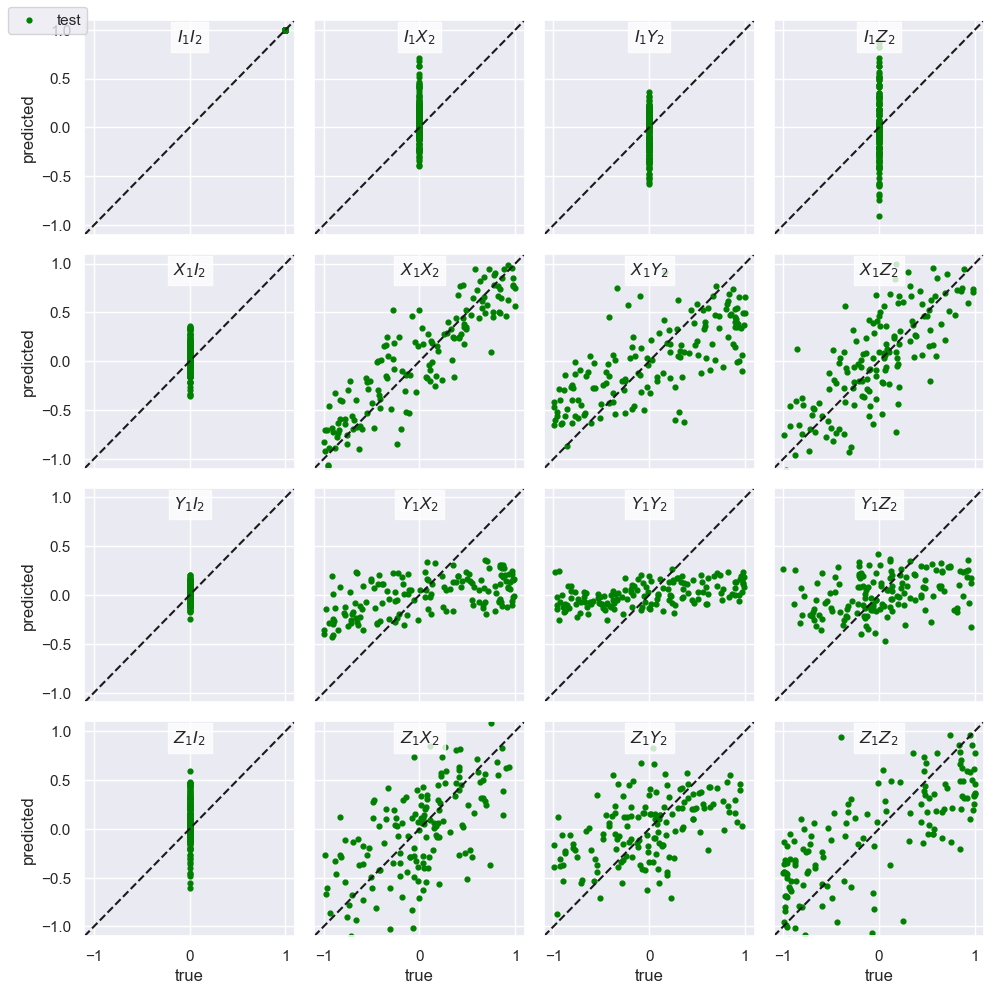

In [65]:
import QELM
importlib.reload(QELM)


paulis_on_first_qubit = [qutip.tensor(p, qutip.qeye(2)) for p in one_qubit_paulis]
paulis_on_second_qubit = [qutip.tensor(qutip.qeye(2), p) for p in one_qubit_paulis]

experimentalDataset = ExperimentalDataset(dir_experimental_data_0930)
experimentalDataset.merge_repetitions(mean_or_sum='mean')
experimentalDataset.marginalize_singles_columns()
# prepare training data for singles on first walker
train_dict1 = experimentalDataset.get_training_dataset(
    which_states='sep', which_counts='singles_1',
    target_observables=paulis_on_first_qubit
)
train_dict1['counts'] = train_dict1['counts'] / train_dict1['counts'].sum(axis=0)  # normalize the counts
qelm1 = QELM.QELM(train_dict=train_dict1)  # this will train the QELM on the first walker
# prepare training data for singles on second walker
train_dict2 = experimentalDataset.get_training_dataset(
    which_states='sep', which_counts='singles_2',
    target_observables=paulis_on_second_qubit
)
train_dict2['counts'] = train_dict2['counts'] / train_dict2['counts'].sum(axis=0)  # normalize the counts
qelm2 = QELM.QELM(train_dict=train_dict2)  # this will train the QELM on the second walker
# prepare test data for the two-qubit observables, using the doubles counts on entangled states
test_dict = experimentalDataset.get_training_dataset(
    which_states='ent', which_counts='doubles',
    target_observables=two_qubit_paulis
)
test_dict['counts'] = test_dict['counts'] / test_dict['counts'].sum(axis=0)  # normalize the counts
# combine the W matrices obtained fron individual singles training and use the result to test on doubles
twoqubit_W = np.kron(qelm1.W, qelm2.W)
twoqubit_qelm = QELM.QELM(W=twoqubit_W, test_dict=test_dict)
twoqubit_qelm.compute_MSE(display_results=False, train=False)
# display results
display(twoqubit_qelm.test_MSE.reshape(4, 4))

# qelm.compute_MSE(display_results=False)
# display(qelm.test_MSE.reshape(4, 4))
# # do a scatter plot of the predictions vs the expvals, for each of the 16 observables
plot_paulis_scatter(twoqubit_qelm, plotly=False)